<a href="https://colab.research.google.com/github/Sanjero20/LE1_SANTOS_AN/blob/main/LE1_SANTOS_AN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
features = abalone.data.features
target = abalone.data.targets

In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
dtypes: float64(7), object(1)
memory usage: 261.2+ KB


In [5]:
features.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


### Check for duplication and null values

In [6]:
hasDuplicate = features.duplicated().sum()
hasNullValues = features.isnull().sum()

print(hasDuplicate)
print(hasNullValues)

0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64


### Process data

In [7]:
# Drop the "Sex" column because it is categorical
features = features.drop(columns=["Sex"])

In [8]:
# Check the shape of both df
print('shapes\n')
print(features.shape)
print(target.shape)

# List the columns
print("\nColumn List\n")
print(features.columns)

shapes

(4177, 7)
(4177, 1)

Column List

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')


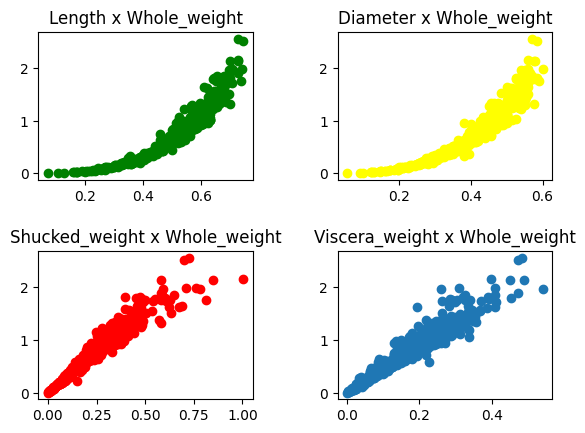

In [9]:
# Only use 500 rows
features = features[:500]

X1 = features["Length"]
X2 = features["Diameter"]
X3 = features["Shell_weight"]
X4 = features["Viscera_weight"]

y = features["Whole_weight"]


X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)
X4 = np.array(X4)

y = np.array(y)

fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=3)

axs[0, 0].set_title('Length x Whole_weight')
axs[0, 0].plot(X1, y, "o", color="green")

axs[0, 1].set_title(f'Diameter x Whole_weight')
axs[0, 1].plot(X2, y, "o", color="yellow")

axs[1, 0].set_title(f'Shucked_weight x Whole_weight')
axs[1, 0].plot(X3, y, "o", color="red")

axs[1, 1].set_title('Viscera_weight x Whole_weight')
axs[1, 1].plot(X4, y, "o")


In [10]:
# Reshape the arrays to match requirement
X1 = np.reshape(X1, (-1, 1))
X2 = np.reshape(X2, (-1, 1))
X3 = np.reshape(X3, (-1, 1))
X4 = np.reshape(X4, (-1, 1))

y = np.reshape(y, (-1,1))

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class LinearModel:
  def __init__(self, x, y):
    self.model = LinearRegression()
    self.x = x
    self.y = y

    self.train_model()

  def train_model(self):
      x_train, x_test, y_train, y_test = train_test_split(self.x, self.y, test_size=0.3, random_state=69)
      self.model.fit(x_train, y_train)

      # set values to public variable
      self.x_train = x_train
      self.x_test = x_test
      self.y_train = y_train
      self.y_test = y_test

  def check_accuracy(self):
      accuracy = self.model.score(self.x_train, self.y_train)
      accuracy = round(accuracy * 100, 4)
      print(f"Model has an accuracy of {accuracy}%")
      return ""

  def get_predictions(self):
    prediction = self.model.predict(self.x_test)
    return prediction

  def check_metrics(self):
    prediction = self.get_predictions()

    mae = mean_absolute_error(prediction, self.y_test)
    mse = mean_squared_error(prediction, self.y_test)
    r2 = r2_score(prediction, self.y_test)

    print(f"Model Metrics")
    print(f"Mean Absolute Error:\t{mae}")
    print(f"Mean Squared Error:\t{mse}")
    print(f"R2 Score:\t\t{r2}")
    return ""

  def show_plot(self, title, color, line_color="blue"):
    plt.plot(self.x_test, self.y_test, "o", color=color)
    plt.plot(self.x_test, self.get_predictions(), "-", color=line_color)
    plt.title(title)

Model has an accuracy of 86.2272%
Model Metrics
Mean Absolute Error:	0.14522875548618
Mean Squared Error:	0.03947229137574808
R2 Score:		0.8125742902491275
 




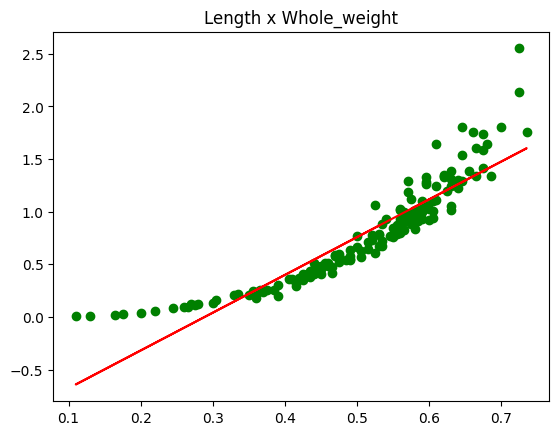

In [12]:
# Length x Whole Weight
m1 = LinearModel(X1, y)

accuracy = m1.check_accuracy()
metrics = m1.check_metrics()

print(accuracy, '\n')
print(metrics)

m1.show_plot("Length x Whole_weight", "green", "red")

Model has an accuracy of 86.3642%
Model Metrics
Mean Absolute Error:	0.14244861345062404
Mean Squared Error:	0.03797780746765505
R2 Score:		0.8142346619184148
 




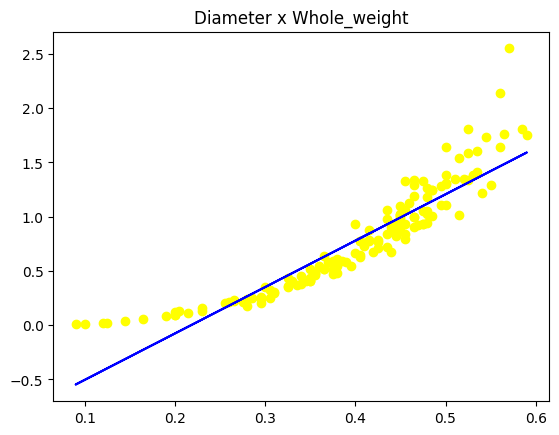

In [13]:
# Diameter x Whole_weight
m2 = LinearModel(X2, y)

accuracy = m2.check_accuracy()
metrics = m2.check_metrics()

print(accuracy, '\n')
print(metrics)

m2.show_plot("Diameter x Whole_weight", "yellow", "blue")

Model has an accuracy of 92.9158%
Model Metrics
Mean Absolute Error:	0.09431585860364051
Mean Squared Error:	0.021125821175183496
R2 Score:		0.9009613815425155
 




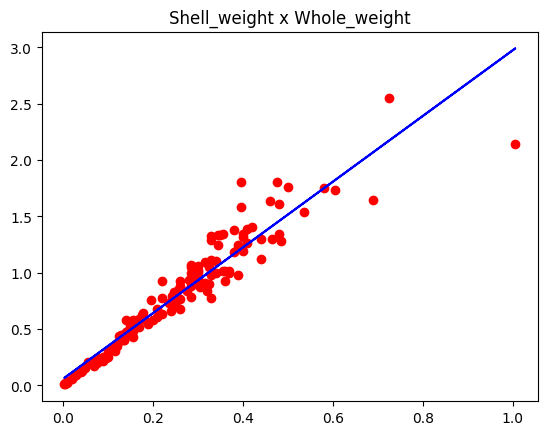

In [14]:
# Shell_weight x Whole_weight
m3 = LinearModel(X3, y)

accuracy = m3.check_accuracy()
metrics = m3.check_metrics()

print(accuracy, '\n')
print(metrics)

m3.show_plot("Shell_weight x Whole_weight", "red", "blue")

Model has an accuracy of 91.3341%
Model Metrics
Mean Absolute Error:	0.09492589034805601
Mean Squared Error:	0.018308388717881922
R2 Score:		0.9164675153830635
 




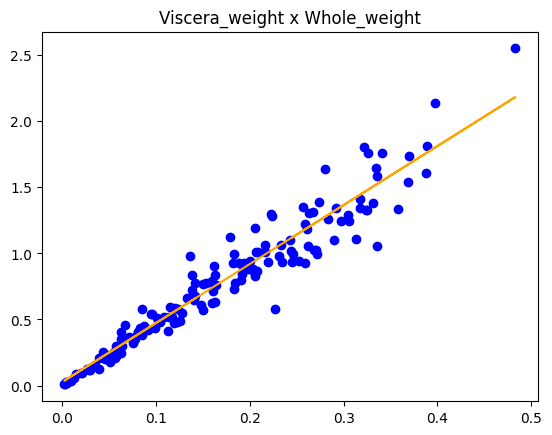

In [15]:
# Viscera_weight x Whole_weight
m4 = LinearModel(X4, y)

accuracy = m4.check_accuracy()
metrics = m4.check_metrics()

print(accuracy, '\n')
print(metrics)

m4.show_plot("Viscera_weight x Whole_weight", "blue", "orange")

# Conclusion

The model was trained using linear regression, each model was paired with the "Whole_weight" column

| Model   |  Accuracy |
| :-----: | --------- |
| 1       | 86.2272 % |
| 2       | 86.3642 % |
| 3       | 92.9158 % |
| 4       | 91.3341 % |

> Therefore, model 3 (which is trained on shell_weight and whole_weight) has the best performance